In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from Lib.BEM_Solver.BEM_2D import *
from Lib.Domain_Decomposition.Coupling_Main import *

# Domain decomposition method (DDM)
## Test1 of L-shape domain problem in IJNME

<br />
<img align="left" src="img/Test1.png" alt="Drawing" style="width: 600px;"/>
<br /><br /><br />

### Step1. Setup BEM subdomains

Total DOF= 8


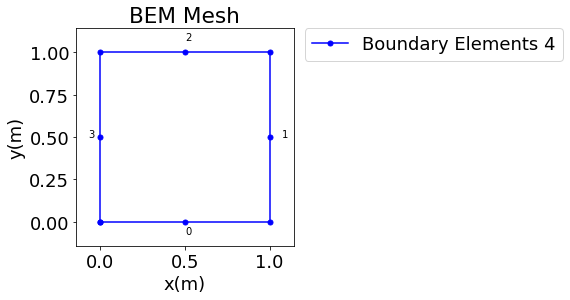

Total DOF= 14


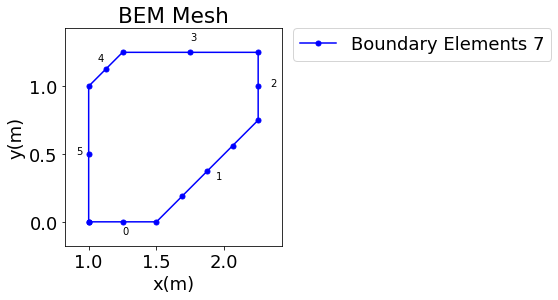

Total DOF= 8


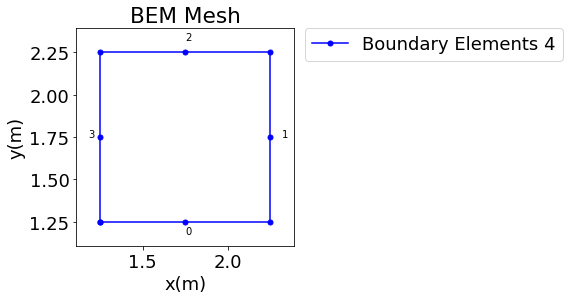

In [2]:
#####Subdomain1########
BEM_Case1=BEM2D()

#1.Build Mesh
Boundary_vert=[(0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 1.0)] #Anti-clock wise for internal domain
element_esize=1

BEM_Case1.set_Mesh(Boundary_vert,[],element_esize,[],Type="Quad")

#2.Set Boundary condition
bc0=[(3,100)]
bc1=[(1,0)]

BEM_Case1.set_BoundaryCondition(DirichletBC=bc0)
#BEM_Case1.print_debug()

#####Subdomain2########
BEM_Case2=BEM2D()

#1.Build Mesh
Boundary_vert=[(1.0, 0.0), (1.5, 0.0), (2.25, 0.75),(2.25,1.25),(1.25,1.25),(1.0, 1.0)] #Anti-clock wise for internal domain
element_esize=1

BEM_Case2.set_Mesh(Boundary_vert,[],element_esize,[],Type="Quad")

#2.Set Boundary condition
bc0=[(1,10)]
bc1=[(5,0),(3,0)]
#bc1=[(3,1)]
BEM_Case2.set_BoundaryCondition(DirichletBC=bc0)
#BEM_Case2.print_debug()

#####Subdomain3########
BEM_Case3=BEM2D()

#1.Build Mesh
Boundary_vert=[(1.25, 1.25), (2.25, 1.25), (2.25, 2.25), (1.25, 2.25)] #Anti-clock wise for internal domain
element_esize=1

BEM_Case3.set_Mesh(Boundary_vert,[],element_esize,[],Type="Quad")

#2.Set Boundary condition
bc0=[(2,100)]
bc1=[(0,0)]
#bc1=[(3,1)]
BEM_Case3.set_BoundaryCondition(DirichletBC=bc0)
#BEM_Case2.print_debug()

### Step2. Setup iterative coupling solver

-----Mesh Info-----
Total Number of Elements: 15
Total Number of Subdomains: 3


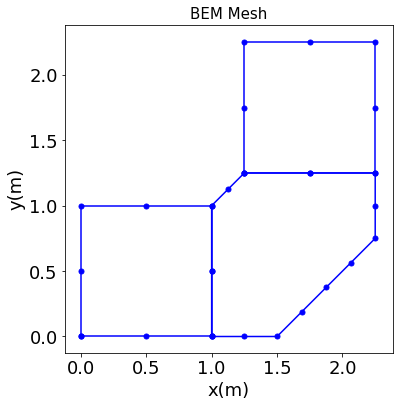

In [3]:
BEMCases=[BEM_Case1,BEM_Case2,BEM_Case3] #BEM_Case1,BEM_Case2 are coupled
CommonEdges=[[(1.0, 0.0), (1.0, 1.0)],
             [(1.25, 1.25), (2.25, 1.25)]
            ]
Connects=[[(1,0)],  #BEM_case1 connect with BEM_case2(1) at its face 1 
          [(0,0),(2,1)],  #BEM_case2 coonect with BEM_case1(0) at its face 3
          [(1,1)]] 
BEMSolver=DDM_Solver(BEMobj=BEMCases,Intersection=CommonEdges,Connection=Connects)

### Step3. Parallel Robin-Robin Algorithm

-----Mesh Info-----
Total Number of Elements: 15
Total Number of Subdomains: 3


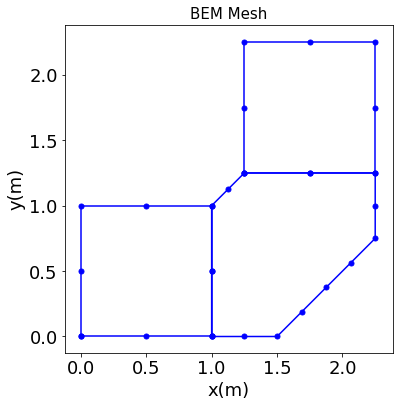

1	1.0		alpha:	0.5
2	0.4810725736228771		alpha:	0.5
3	0.4099087722305186		alpha:	0.9991393018998834
4	0.2259873441802148		alpha:	1.0057604416702912
5	0.209430302095515		alpha:	2.2088065328725386
6	0.06647881638095199		alpha:	2.2386889674116617
7	0.030465988064262754		alpha:	0.6597592004990794
8	0.00286358641705564		alpha:	0.6331198792523549
9	0.0014389038264645054		alpha:	0.7546887371201604
10	0.0068260239332533865		alpha:	4.256256522436881
11	0.0005695455740960716		alpha:	4.314943100683565
12	0.00039758357093003265		alpha:	0.6977667519059783
13	0.00010423038182705456		alpha:	0.5648694015237883
14	2.469254017757343e-05		alpha:	0.5819166004065008
15	7.725317460071426e-05		alpha:	2.3584604520263355
16	4.023325282859857e-06		alpha:	2.3689005456126857
Converged at 16 Steps! TOL= 1e-05
Dirichelt [56.93120902 54.3601846  51.10619678]
Robin [20.24344431  9.44476065 -7.2023679 ]


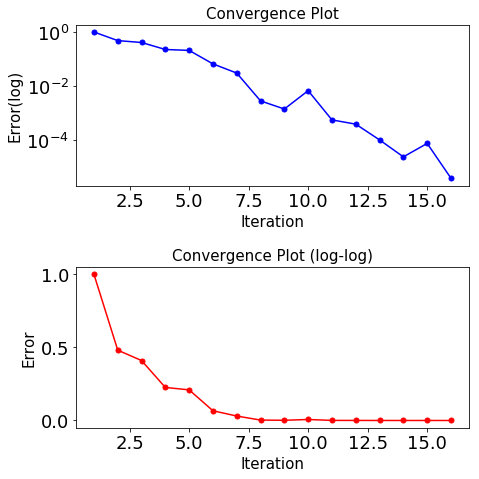

In [4]:
BEMSolver=DDM_Solver(BEMobj=BEMCases,Intersection=CommonEdges,Connection=Connects)
BEMSolver.Solve_Iter(Method="P-RR",TOL=1e-5,alpha=0.5,opt=1) #P-NN

### Step3. Parallel Neumann-Neumann Algorithm

-----Mesh Info-----
Total Number of Elements: 15
Total Number of Subdomains: 3


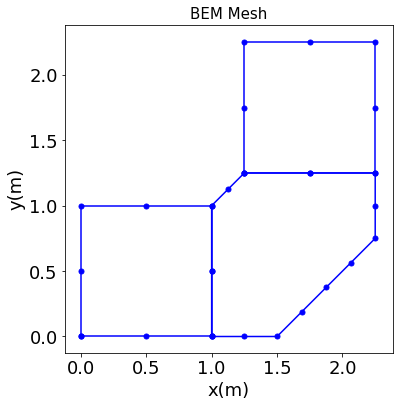

1	1.2546439582365196		alpha:	0.5
2	0.09619114704468293		alpha:	0.5
3	0.01619087923089174		alpha:	0.12427803239546407
4	0.15296040269569877		alpha:	-1.3556502160423634
5	0.09610815605599264		alpha:	0.7911036682070225
6	0.09880259042781155		alpha:	2.1179235690516984
7	0.011713643194449818		alpha:	2.042021475738936
8	0.004234855058324073		alpha:	0.7268782025912688
9	0.0013496931246517617		alpha:	0.3943105107339922
10	0.0024532177576535733		alpha:	1.0860283049587773
11	0.0019131204159301034		alpha:	2.099338638531667
12	0.0006074571387733742		alpha:	2.050475791695586
13	0.00024634109017906367		alpha:	0.8466053777774559
14	5.550379484671647e-05		alpha:	0.26561110680420064
15	0.00023632877559634705		alpha:	1.4712531914460856
16	9.735478025581785e-05		alpha:	0.7930821835572232
17	2.24579504924469e-05		alpha:	0.2851444756157609
18	0.00016694984887952223		alpha:	2.4198031244733214
19	4.987053161811077e-05		alpha:	0.5383333419854104
20	1.2108971532706382e-05		alpha:	0.343003980138518
21	8.4547838

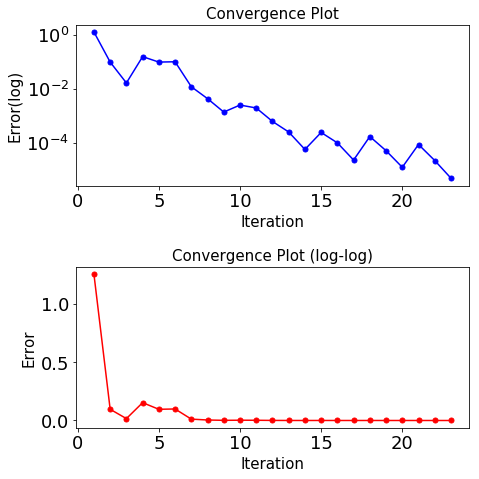

In [5]:
BEMSolver=DDM_Solver(BEMobj=BEMCases,Intersection=CommonEdges,Connection=Connects)
BEMSolver.Solve_Iter(Method="P-NN",TOL=1e-5,alpha=0.5,opt=1) #P-NN

### Step3. Parallel Dirichlet-Dirichlet Algorithm

-----Mesh Info-----
Total Number of Elements: 15
Total Number of Subdomains: 3


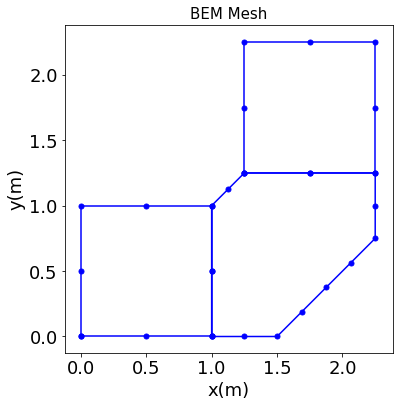

1	0.37339177672511914		alpha:	0.5
2	0.7130532265110662		alpha:	0.5
3	1.0809519740766642		alpha:	0.10645137142314212
4	0.33960316772519966		alpha:	0.07967355335058224
5	0.0811078123658768		alpha:	0.06582247965106289
6	0.0156265438972509		alpha:	0.06952858513677801
7	0.0146825222220761		alpha:	0.1312779552481485
8	0.00029455267353653086		alpha:	0.13243537535720262
9	9.82188937956261e-05		alpha:	0.0717109029339927
10	9.827089668770397e-06		alpha:	0.06452770140300362
Converged at 10 Steps! TOL= 1e-05
Dirichelt [56.93122996 54.36020437 51.10621143]
Neumann [-36.69184126 -44.91337228 -58.3125539 ]


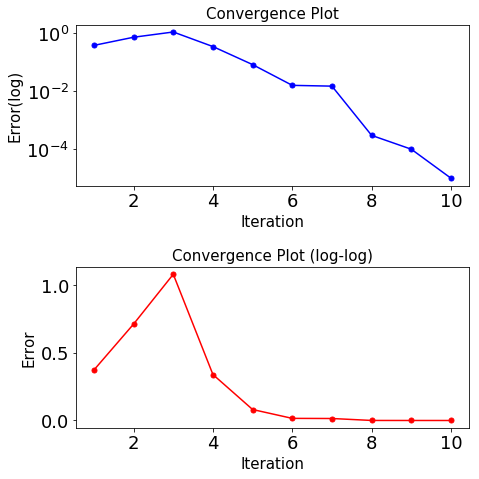

In [6]:
BEMSolver=DDM_Solver(BEMobj=BEMCases,Intersection=CommonEdges,Connection=Connects)
BEMSolver.Solve_Iter(Method="P-DD",TOL=1e-5,alpha=0.5,opt=1) #P-DD

### Step3. Sequential Dirichlet-Neumann Algorithm

-----Mesh Info-----
Total Number of Elements: 15
Total Number of Subdomains: 3


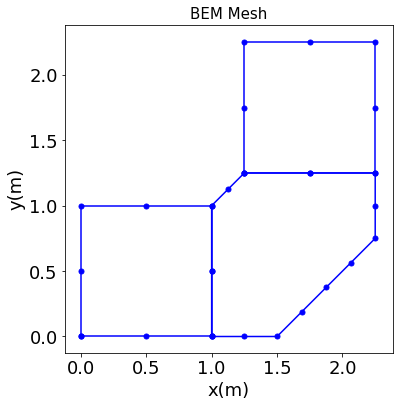

1	1.0		alpha:	0.5
2	0.9187589502359431		alpha:	0.5
3	0.40497179787986276		alpha:	0.6293947110610707
4	0.05128185069940326		alpha:	0.7242816501971052
5	0.008828552814456433		alpha:	0.6393922257744876
6	0.0005891441153408639		alpha:	0.6238126307381016
7	5.060156070568029e-05		alpha:	0.6047480535046635
8	8.35275071905661e-06		alpha:	0.5469243513206691
Converged at 8 Steps! TOL= 1e-05
Dirichelt [37.76109193 36.41665662 34.69852077]
Neumann [-21.15582616 -26.77013431 -35.58543101]


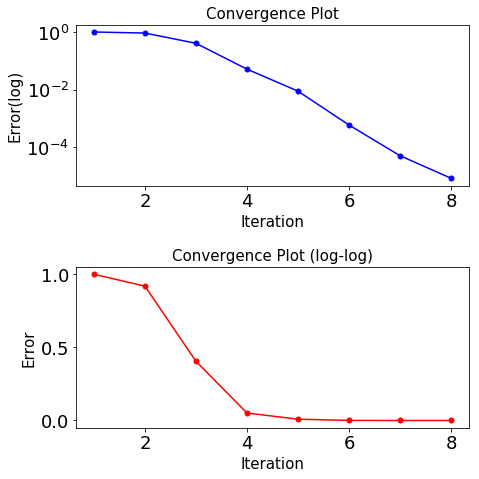

In [7]:
BEMSolver=DDM_Solver(BEMobj=BEMCases,Intersection=CommonEdges,Connection=Connects)
BEMSolver.Solve_Iter(Method="S-DN",TOL=1e-5,alpha=0.5,opt=1) #p-dn

### Step4. Solution Visulization & Verification

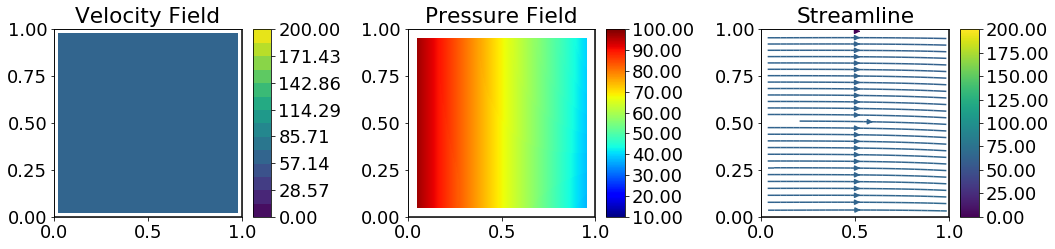

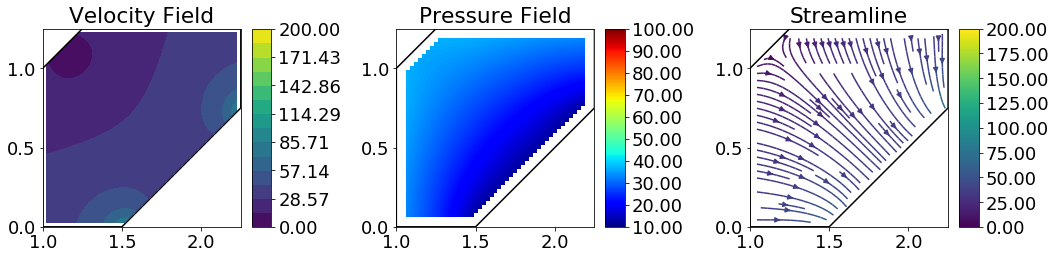

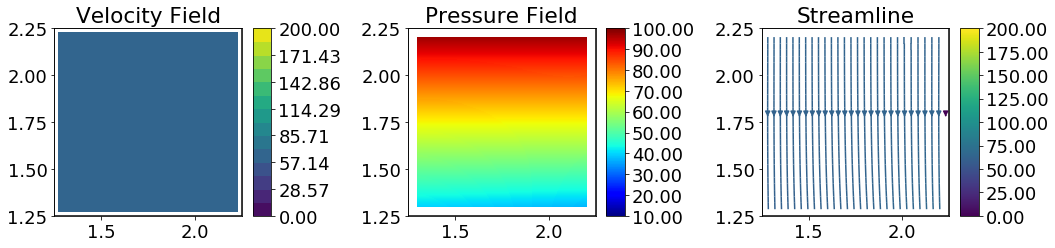

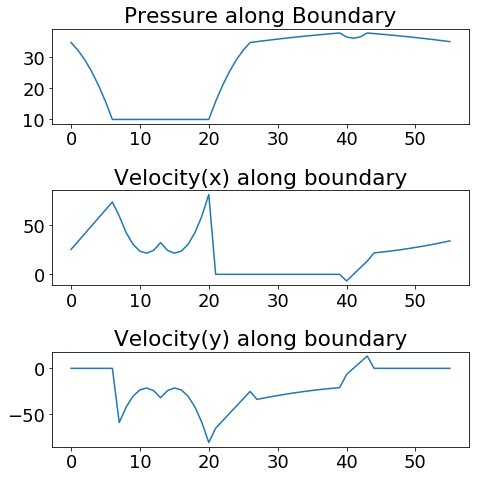

In [8]:
#Pressure and velocity contour results
PUV1=BEM_Case1.plot_Solution(v_range=(0,200),p_range=(10,100))
PUV2=BEM_Case2.plot_Solution(v_range=(0,200),p_range=(10,100))
PUV2=BEM_Case3.plot_Solution(v_range=(0,200),p_range=(10,100))
#Pressure and velocity along the boundary
P=BEM_Case2.plot_SolutionBD()